In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data=pd.read_csv('sub-division_population_of_pakistan.csv')

In [12]:
data.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),...,POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,...,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,...,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,...,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,...,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,...,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


In [13]:
data['PROVINCE'].unique()

array(['PUNJAB', 'SINDH', 'BALOCHISTAN', 'KPK', 'KPK/FATA'], dtype=object)

In [14]:
divisions=data.groupby('PROVINCE')['DIVISION'].unique()
prov_div=dict(zip(divisions.index,list(divisions.values)))

for prov,div in prov_div.items():
    print(f"There are {len(div)} divisions in {prov}")
print(f"There are 33 division in Pakistan")

There are 5 divisions in BALOCHISTAN
There are 7 divisions in KPK
There are 5 divisions in KPK/FATA
There are 9 divisions in PUNJAB
There are 7 divisions in SINDH
There are 33 division in Pakistan


Text(0, 0.5, 'Counts of Divisions')

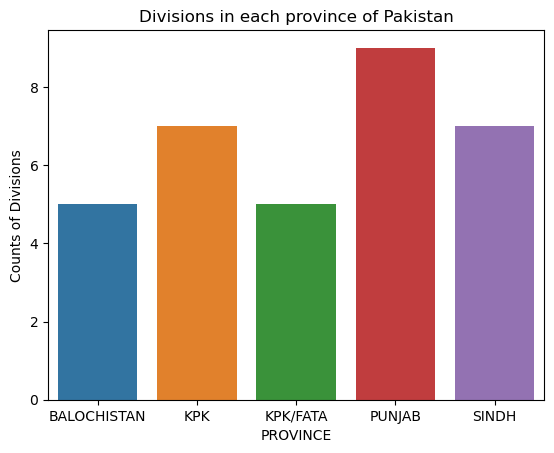

In [15]:
sns.barplot(x=data.groupby('PROVINCE')['DIVISION'].nunique().index,y=data.groupby('PROVINCE')['DIVISION'].nunique().values)
plt.title('Divisions in each province of Pakistan')
plt.ylabel('Counts of Divisions')

In [16]:
data.groupby(['PROVINCE','DIVISION'])['DISTRICT'].nunique()

PROVINCE     DIVISION                    
BALOCHISTAN  Kalat Division                   3
             Makran Division                  7
             Naseerabad Division              5
             Quetta Division                 10
             Zhob Division                    6
KPK          BANNU DIVISION                   2
             DERA ISMAIL KHAN DIVISION        2
             HAZARA DIVISION                  5
             KOHAT DIVISION                   3
             MALAKAND DIVISION                6
             MARDAN DIVISION                  2
             PESHAWAR DIVISION                3
KPK/FATA     BANNU DIVISION                   3
             DERA ISMAIL KHAN DIVISION        2
             KOHAT DIVISION                   3
             MALAKAND DIVISION                1
             PESHAWAR DIVISION                3
PUNJAB       BAHAWALPUR DIVISION              3
             D.G.KHAN DIVISION                4
             FAISALABAD DIVISION              

Text(0, 0.5, 'Counts of Districts')

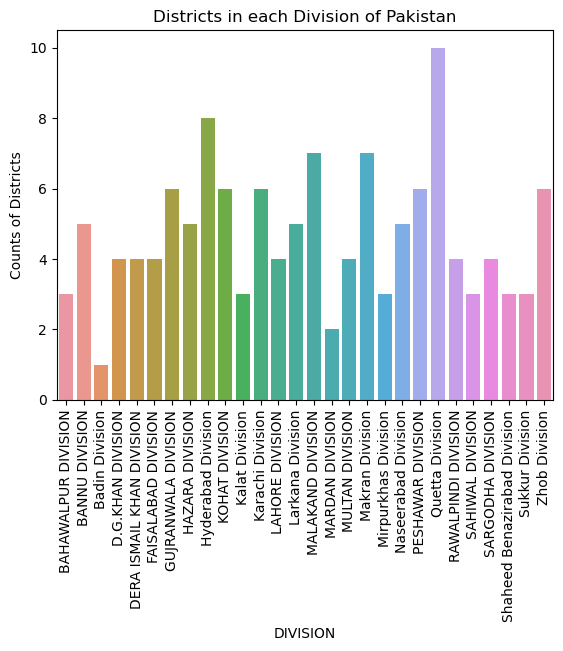

In [17]:
sns.barplot(x=data.groupby(['DIVISION'])['DISTRICT'].nunique().index,y=data.groupby(['DIVISION'])['DISTRICT'].nunique().values)
plt.xticks(rotation=90)
plt.title('Districts in each Division of Pakistan')
plt.ylabel('Counts of Districts')

In [18]:
print(data.groupby(['PROVINCE'])['DISTRICT'].nunique())
print(f"There are total {data.groupby(['PROVINCE'])['DISTRICT'].nunique().sum()} districts in Pakistan" )

PROVINCE
BALOCHISTAN    31
KPK            23
KPK/FATA       12
PUNJAB         36
SINDH          29
Name: DISTRICT, dtype: int64
There are total 131 districts in Pakistan


Text(0.5, 1.0, 'Districts in each province of Pakistan')

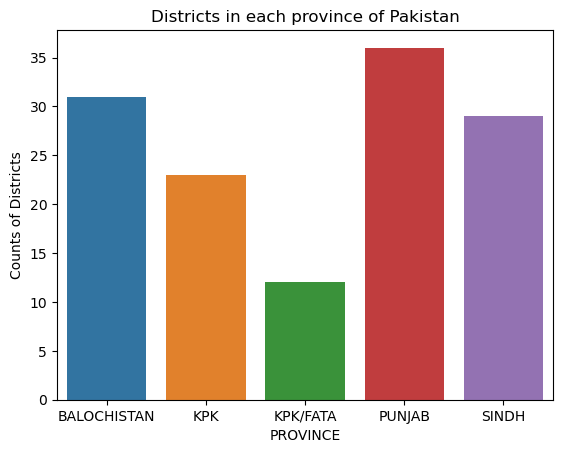

In [19]:
sns.barplot(x=data.groupby(['PROVINCE'])['DISTRICT'].nunique().index,y=data.groupby(['PROVINCE'])['DISTRICT'].nunique().values)
plt.ylabel("Counts of Districts")
plt.title('Districts in each province of Pakistan')

In [20]:
data['DIVISION']=data['DIVISION'].str.upper()

In [21]:
def how_many_districts(div):
    division=div.upper()
    fdata=data[data['DIVISION'].str.contains(division)]
    if len(fdata)==0:
        print("No record found. Please recheck division name")
        return
    print(f"There are {len(fdata['DISTRICT'].value_counts())} distrcits in {division} {fdata['PROVINCE'].unique()[0]}\nDistricts: {list(fdata['DISTRICT'].value_counts().index)}")

In [22]:
how_many_districts('rawalpindi')

There are 4 distrcits in RAWALPINDI PUNJAB
Districts: ['RAWALPINDI DISTRICT', 'ATTOCK DISTRICT', 'CHAKWAL DISTRICT', 'JHELUM DISTRICT']


In [23]:
print(f"There are {data.groupby(['PROVINCE','DIVISION','DISTRICT'])['SUB DIVISION'].nunique().sum()} sub divisions in Pakistan") 

There are 528 sub divisions in Pakistan


In [24]:
data.groupby('PROVINCE')['SUB DIVISION'].nunique()

PROVINCE
BALOCHISTAN    131
KPK             71
KPK/FATA        46
PUNJAB         143
SINDH          137
Name: SUB DIVISION, dtype: int64

Text(0.5, 1.0, 'Sub Divisions in each province of Pakistan')

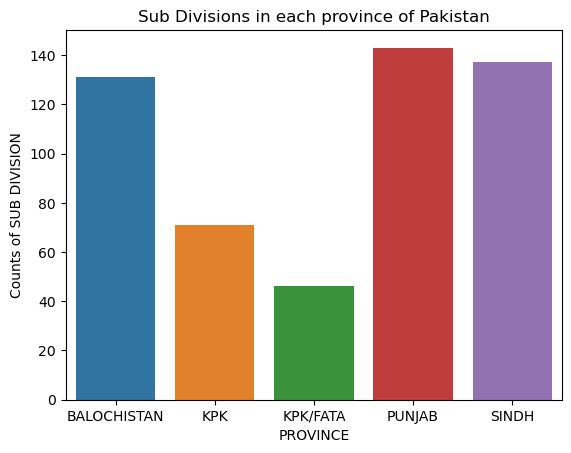

In [25]:
sns.barplot(x=data.groupby(['PROVINCE'])['SUB DIVISION'].nunique().index,y=data.groupby(['PROVINCE'])['SUB DIVISION'].nunique().values)
plt.ylabel("Counts of SUB DIVISION")
plt.title('Sub Divisions in each province of Pakistan')

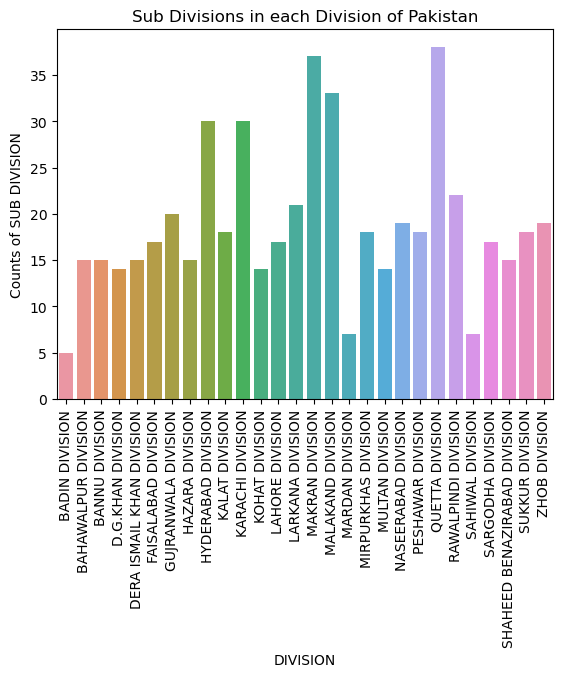

In [26]:
sns.barplot(x=data.groupby(['DIVISION'])['SUB DIVISION'].nunique().index,y=data.groupby(['DIVISION'])['SUB DIVISION'].nunique().values)
plt.ylabel("Counts of SUB DIVISION")
plt.title('Sub Divisions in each Division of Pakistan')
plt.xticks(rotation=90)
plt.show()

In [27]:
b=data.groupby('DISTRICT')['SUB DIVISION'].nunique().mean()
print(f"There are average {b} sub divisions in districts of Pakistan")

There are average 4.030534351145038 sub divisions in districts of Pakistan


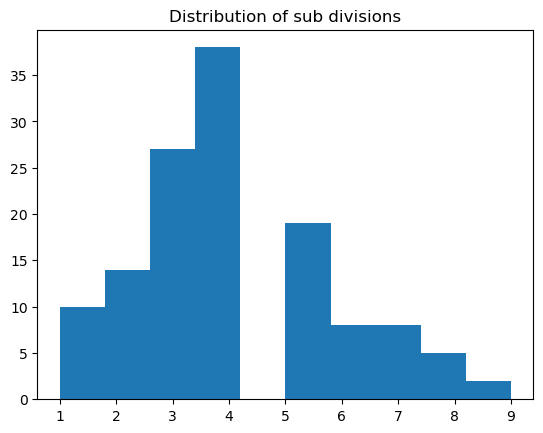

In [28]:
plt.hist(data.groupby('DISTRICT')['SUB DIVISION'].nunique())
plt.title(f'Distribution of sub divisions')
plt.show()

In [29]:
def how_many_tehsils(dist):
    district=dist.upper()
    fdata=data[data['DISTRICT'].str.contains(district)]
    if len(fdata)==0:
        print("No record found. Please recheck district name")
        return
    print(f"There are {len(fdata['SUB DIVISION'].value_counts())} sub divisions in {fdata['DISTRICT'].unique()[0] if len(fdata['DISTRICT'].unique())==1 else fdata['DISTRICT'].unique()}/{fdata['DIVISION'].unique()[0]}/{fdata['PROVINCE'].unique()[0]}\nSub Divisions: {list(fdata['SUB DIVISION'].value_counts().index)}")

In [30]:
how_many_tehsils('rawalpindi')

There are 7 sub divisions in RAWALPINDI DISTRICT/RAWALPINDI DIVISION/PUNJAB
Sub Divisions: ['GUJAR KHAN TEHSIL', 'KAHUTA TEHSIL', 'KALLAR SAYADDAN TEHSIL', 'KOTLI SATTIAN TEHSIL', 'MURREE TEHSIL', 'RAWALPINDI TEHSIL', 'TAXILA TEHSIL']


In [31]:
data['AREA (sq.km)'].sum()

787779.1

In [32]:
data['PROVINCE']=data['PROVINCE'].str.replace('KPK/FATA','KPK')
data.groupby('PROVINCE')['AREA (sq.km)'].sum().sort_values(ascending=False)

PROVINCE
BALOCHISTAN    345464.0
PUNJAB         202693.0
SINDH          140136.0
KPK             99486.1
Name: AREA (sq.km), dtype: float64

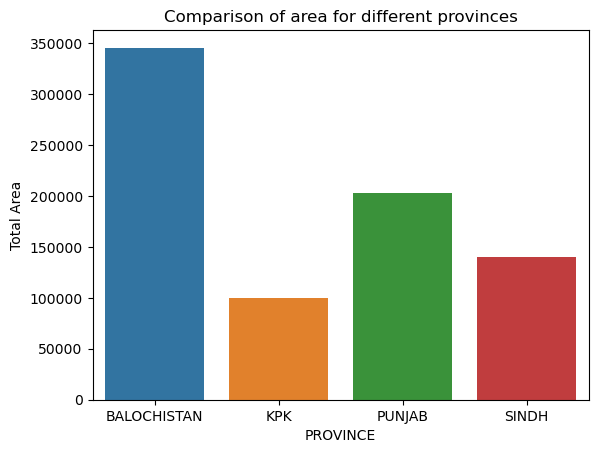

In [33]:
sns.barplot(x=data.groupby('PROVINCE')['AREA (sq.km)'].sum().index,y=data.groupby('PROVINCE')['AREA (sq.km)'].sum().values)
plt.ylabel("Total Area")
plt.title('Comparison of area for different provinces')
plt.show()

In [34]:
div_area=data.groupby('DIVISION')['AREA (sq.km)'].sum()
div_area

DIVISION
BADIN DIVISION                    6858.0
BAHAWALPUR DIVISION              45588.0
BANNU DIVISION                    9975.0
D.G.KHAN DIVISION                36955.0
DERA ISMAIL KHAN DIVISION        17633.0
FAISALABAD DIVISION              17918.0
GUJRANWALA DIVISION              17207.0
HAZARA DIVISION                  17227.1
HYDERABAD DIVISION               41048.0
KALAT DIVISION                   47104.0
KARACHI DIVISION                  3513.0
KOHAT DIVISION                   10907.0
LAHORE DIVISION                  11727.0
LARKANA DIVISION                 15213.0
MAKRAN DIVISION                 143591.0
MALAKAND DIVISION                32114.0
MARDAN DIVISION                   3175.0
MIRPURKHAS DIVISION              28170.0
MULTAN DIVISION                  15211.0
NASEERABAD DIVISION              15129.0
PESHAWAR DIVISION                 8455.0
QUETTA DIVISION                  95252.0
RAWALPINDI DIVISION              22254.0
SAHIWAL DIVISION                 10302.0
SARGODH

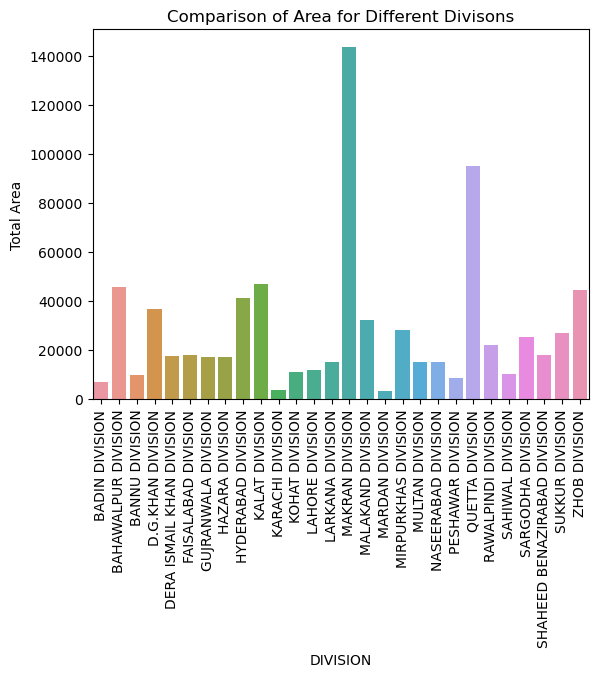

In [35]:
sns.barplot(x=div_area.index,y=div_area.values)
plt.ylabel("Total Area")
plt.title('Comparison of Area for Different Divisons')
plt.xticks(rotation=90)
plt.show()

In [36]:
fdata=data.groupby('DISTRICT')['AREA (sq.km)'].sum().sort_values(ascending=False)
fdata

DISTRICT
CHAGAI DISTRICT             44748.0
KHUZDAR DISTRICT            35380.0
WASHUK DISTRICT             33093.0
AWARAN DISTRICT             29510.0
BAHAWALPUR DISTRICT         24830.0
                             ...   
KARACHI SOUTH DISTRICT        152.0
FR LAKKI MARWAT DISTRICT      132.0
KARACHI EAST DISTRICT         123.0
KORANGI DISTRICT               90.0
KARACHI CENTRAL DISTRICT       75.0
Name: AREA (sq.km), Length: 131, dtype: float64

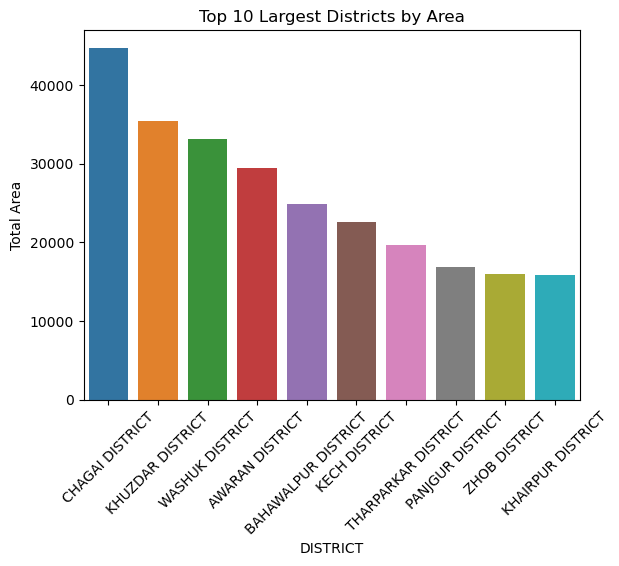

In [37]:
sns.barplot(x=fdata.index[:10],y=sorted(list(fdata.values),reverse=True)[:10])
plt.ylabel("Total Area")
plt.title('Top 10 Largest Districts by Area')
plt.xticks(rotation=45)
plt.show()

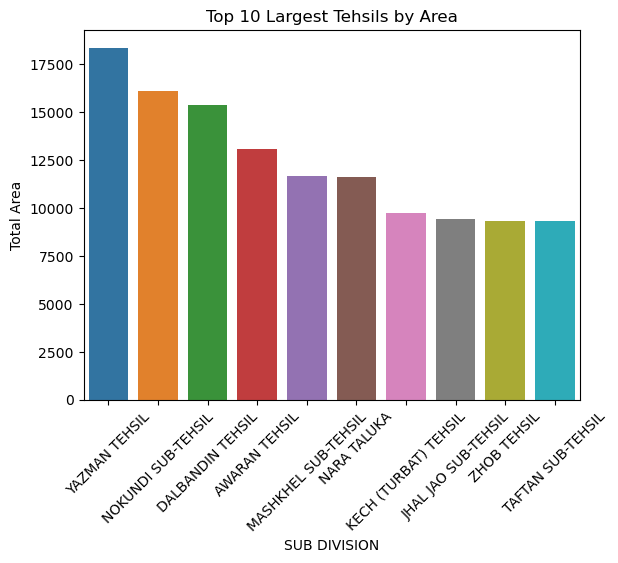

In [38]:
fdata=data.groupby('SUB DIVISION')['AREA (sq.km)'].sum().sort_values(ascending=False)
sns.barplot(x=fdata.index[:10],y=sorted(list(fdata.values),reverse=True)[:10])
plt.ylabel("Total Area")
plt.title('Top 10 Largest Tehsils by Area')
plt.xticks(rotation=45)
plt.show()

In [39]:
def get_area(name,level='DISTRICT'):
    name=name.upper()
    level=level.upper()
    if level not in ['PROVINCE','DIVISION','DISTRICT','SUB DIVISION']:
        print('Please enter valid level of division')
        return
    fdata=data[data[level].str.contains(name)]
    if len(fdata)==0:
        print('Record not found')
        return
    area=fdata['AREA (sq.km)'].sum()
    print(f'Area of {name} {level} is {area} square kilometers')
        

In [40]:
get_area('attock')
get_area('pindi','division')
get_area('pindi')

Area of ATTOCK DISTRICT is 6857.0 square kilometers
Area of PINDI DIVISION is 22254.0 square kilometers
Area of PINDI DISTRICT is 5285.0 square kilometers


In [41]:
data['TOTAL POULATION']=data['ALL SEXES (RURAL)']+data['ALL SEXES (URBAN)']

In [42]:
fdata=data.groupby('PROVINCE')['TOTAL POULATION'].sum().sort_values(ascending=False)
fdata

PROVINCE
PUNJAB         109054593
SINDH           47844275
KPK             35225530
BALOCHISTAN     12286335
Name: TOTAL POULATION, dtype: int64

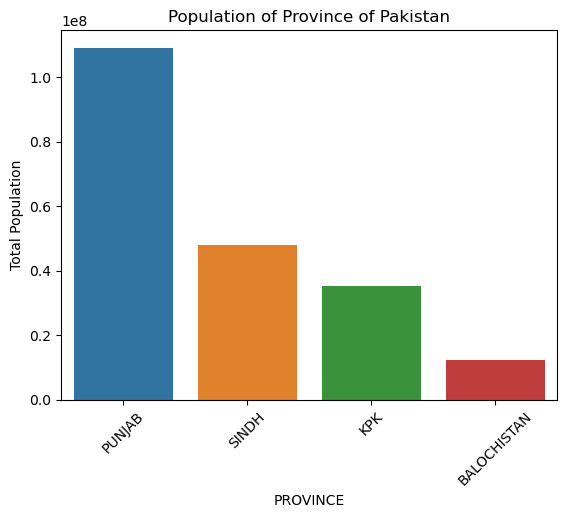

In [43]:
sns.barplot(x=fdata.index,y=fdata.values)
plt.ylabel("Total Population")
plt.title('Population of Province of Pakistan')
plt.xticks(rotation=45)
plt.show()

In [44]:
fdata=data.groupby('PROVINCE')[['ALL SEXES (RURAL)','ALL SEXES (URBAN)']].sum().reset_index()
fdata

,PROVINCE,ALL SEXES (RURAL),ALL SEXES (URBAN)
0,BALOCHISTAN,8879634,3406701
1,KPK,29480593,5744937
2,PUNJAB,68662922,40391671
3,SINDH,23011641,24832634


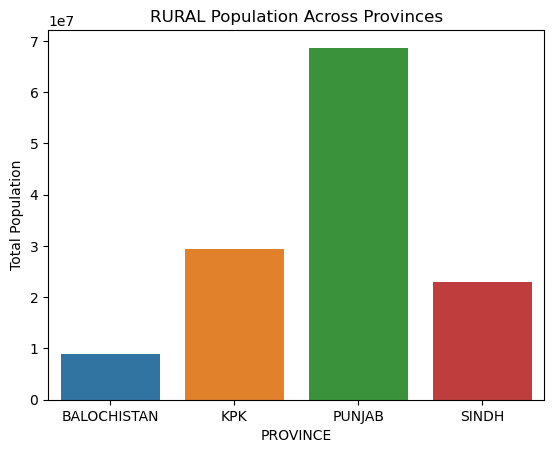

In [45]:
sns.barplot(x='PROVINCE',y='ALL SEXES (RURAL)',data=fdata)
plt.ylabel("Total Population")
plt.title('RURAL Population Across Provinces')
plt.show()

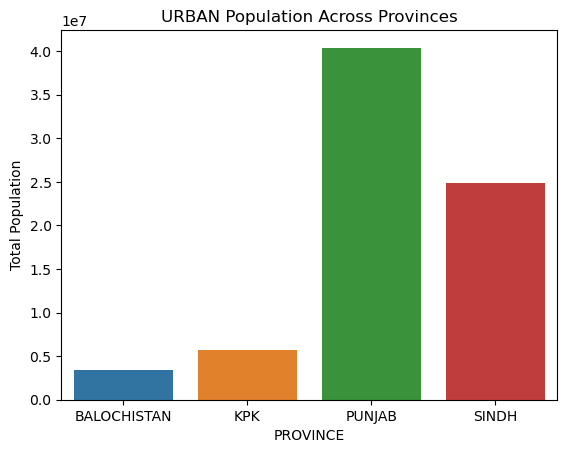

In [46]:
sns.barplot(x='PROVINCE',y='ALL SEXES (URBAN)',data=fdata)
plt.ylabel("Total Population")
plt.title('URBAN Population Across Provinces')
plt.show()

In [47]:
fdata=data.groupby('DIVISION')['TOTAL POULATION'].sum()
fdata

DIVISION
BADIN DIVISION                   1804958
BAHAWALPUR DIVISION             11452594
BANNU DIVISION                   2652867
D.G.KHAN DIVISION               10426847
DERA ISMAIL KHAN DIVISION        2759435
FAISALABAD DIVISION             14185231
GUJRANWALA DIVISION             16120861
HAZARA DIVISION                  5323155
HYDERABAD DIVISION               8780856
KALAT DIVISION                   1476630
KARACHI DIVISION                16024894
KOHAT DIVISION                   2976107
LAHORE DIVISION                 19389856
LARKANA DIVISION                 6190926
MAKRAN DIVISION                  2508969
MALAKAND DIVISION                9321400
MARDAN DIVISION                  3998876
MIRPURKHAS DIVISION              4224945
MULTAN DIVISION                 12268173
NASEERABAD DIVISION              1661077
PESHAWAR DIVISION                8193690
QUETTA DIVISION                  5097730
RAWALPINDI DIVISION             10006624
SAHIWAL DIVISION                 7378065
SARGODH

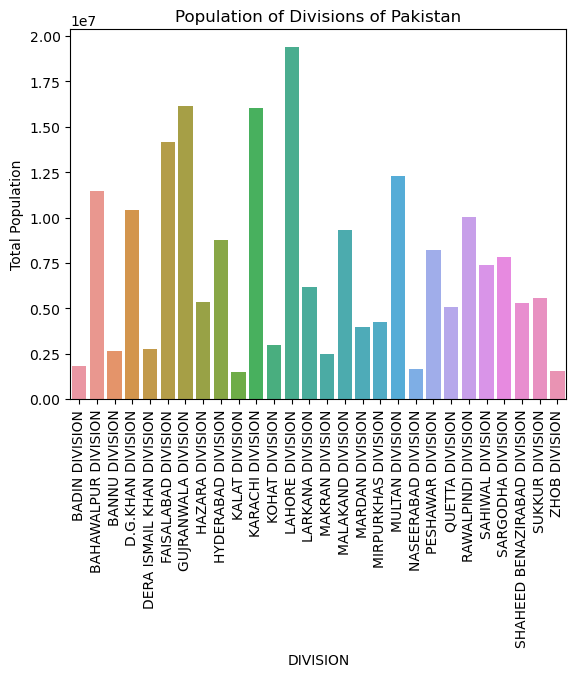

In [48]:
sns.barplot(x=fdata.index,y=fdata.values)
plt.ylabel("Total Population")
plt.title('Population of Divisions of Pakistan')
plt.xticks(rotation=90)
plt.show()

In [49]:
fdata=data.groupby('DIVISION')[['TOTAL POULATION','AREA (sq.km)']].sum().reset_index()
fdata

,DIVISION,TOTAL POULATION,AREA (sq.km)
0,BADIN DIVISION,1804958,6858.0
1,BAHAWALPUR DIVISION,11452594,45588.0
2,BANNU DIVISION,2652867,9975.0
3,D.G.KHAN DIVISION,10426847,36955.0
4,DERA ISMAIL KHAN DIVISION,2759435,17633.0
5,FAISALABAD DIVISION,14185231,17918.0
6,GUJRANWALA DIVISION,16120861,17207.0
7,HAZARA DIVISION,5323155,17227.1
8,HYDERABAD DIVISION,8780856,41048.0
9,KALAT DIVISION,1476630,47104.0


In [50]:
fdata=data.groupby('DIVISION')[['ALL SEXES (RURAL)','ALL SEXES (URBAN)','AREA (sq.km)']].sum().reset_index()
fdata

,DIVISION,ALL SEXES (RURAL),ALL SEXES (URBAN),AREA (sq.km)
0,BADIN DIVISION,1414614,390344,6858.0
1,BAHAWALPUR DIVISION,8629763,2822831,45588.0
2,BANNU DIVISION,2509303,143564,9975.0
3,D.G.KHAN DIVISION,8603072,1823775,36955.0
4,DERA ISMAIL KHAN DIVISION,2352153,407282,17633.0
5,FAISALABAD DIVISION,8955732,5229499,17918.0
6,GUJRANWALA DIVISION,10213964,5906897,17207.0
7,HAZARA DIVISION,4751172,571983,17227.1
8,HYDERABAD DIVISION,5283534,3497322,41048.0
9,KALAT DIVISION,1093478,383152,47104.0


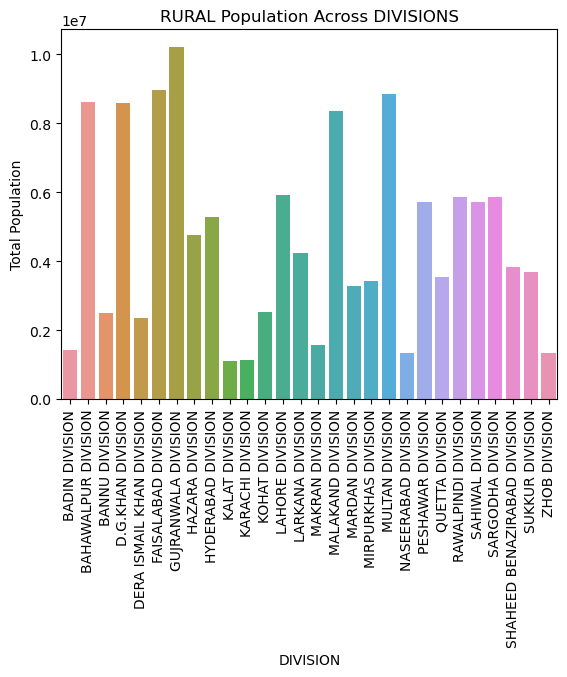

In [51]:
sns.barplot(x='DIVISION',y='ALL SEXES (RURAL)',data=fdata)
plt.ylabel("Total Population")
plt.title('RURAL Population Across DIVISIONS')
plt.xticks(rotation=90)
plt.show()

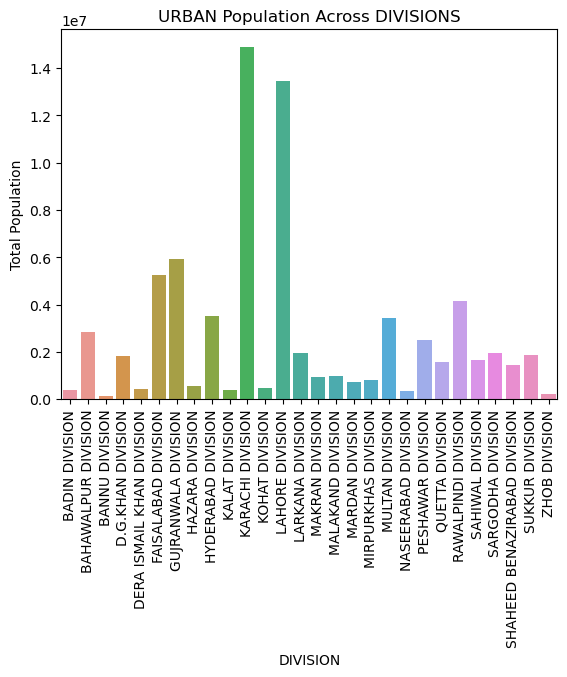

In [52]:
sns.barplot(x='DIVISION',y='ALL SEXES (URBAN)',data=fdata)
plt.ylabel("Total Population")
plt.title('URBAN Population Across DIVISIONS')
plt.xticks(rotation=90)
plt.show()


In [53]:
def print_population(name,level='DISTRICT'):
    name=name.upper()
    level=level.upper()
    if level not in ['PROVINCE','DIVISION','DISTRICT','SUB DIVISION']:
        print('Please enter valid level of division')
        return
    fdata=data[data[level].str.contains(name)]
    if len(fdata)==0:
        print('Record not found')
        return
    urban=fdata['ALL SEXES (URBAN)'].sum()
    rural=fdata['ALL SEXES (RURAL)'].sum()
    print(f'{list(fdata[level])[0] if len(set(list(fdata[level])))==1 else set(list(fdata[level]))}\nRural population: {rural}\nUrban population: {urban}\nTotal Population: {rural+urban}\n')

In [54]:
print_population('attock')
print_population('gujran')
print_population('punjab','province')

ATTOCK DISTRICT
Rural population: 1395470
Urban population: 490908
Total Population: 1886378

GUJRANWALA DISTRICT
Rural population: 2061948
Urban population: 2949118
Total Population: 5011066

PUNJAB
Rural population: 68662922
Urban population: 40391671
Total Population: 109054593



In [55]:
data['TOTAL MALE']=data['MALE (URBAN)']+data['MALE (RURAL)']
data['TOTAL FEMALE']=data['FEMALE (URBAN)']+data['FEMALE (RURAL)']
data['TOTAL TRANSGENDER']=data['TRANSGENDER (URBAN)']+data['TRANSGENDER (RURAL)']

In [57]:
male=data['TOTAL MALE'].sum()
female=data['TOTAL FEMALE'].sum()
transgender=data['TOTAL TRANSGENDER'].sum()
print(f'Total Male {male}')
print(f'Total Female {female}')
print(f'Total Transgender {transgender}')
print(f'Male proportion is {(male/(male+female)*100)}')

Total Male 104606871
Total Female 99782504
Total Transgender 21358
Male proportion is 51.180190261847024
